#Autolib electric car-sharing service company

###Overview
Autolib' is an electric car sharing service that  have electric cars:Bluecars, Utilib and Utilib 14. They do a renting service for these cars. they also have recharging stations for the cars. We are tasked as data scientists to look into and understand the rental data and come up with an research question and thereafter a claim to try and proove

###Defining the question
Determine if the statistical difference between mean of number of bluecars taken on weekdays for 75015 and mean of bluecars taken taken on weekdays for 75017<br>
Null hypothesis- Mean of blue cars taken in postal code 75015 is statistically equal to the mean of blue cars taken in postal code 75017<br>
Alternative Hypothesis- Mean of blue cars taken in postal code 75015 is statistically not equal to the mean of blue cars taken in postal code 75017

###Metrics of success
Our analysis is considered successful if we reject the null hypothesis

###Experimental Design
- Loading Datasets and Preparing the Data.
- Data Cleaning
- Univariae analysis
- Bivariate analysis
- Hypothesis Testing.
- Point estimate
- Confidence level
- Conclusion
- Recommendation


###Data Preparation and exploration

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Set global parameters
plt.rcParams['figure.figsize'] = (12.0,10.0) 
sns.set()
warnings.filterwarnings('ignore')

In [4]:
dfcol = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [3]:
dfgloss = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")

In [6]:
# Preview dataset
dfcol.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [10]:
# Preview dataset
print(dfgloss.shape)
dfgloss


(13, 2)


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Shape of the data
dfcol.shape

(16085, 13)

In [ ]:
#columns datatypes
dfcol.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
dfcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


### Data Cleaning

In [ ]:
# Check for duplicates
dfcol.duplicated().sum()

0

In [ ]:
dfcol.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#Checking our column names for renaming need
dfcol.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#Renaming column names
# dict={'Postal code':'postal_code', 'dayOfWeek':'day_of_week','BlueCars_taken_sum':'bluecars_taken_sum',
#       'BlueCars_returned_sum':'bluecars_returned_sum','Utilib_taken_sum':'utilib_taken_sum',
#       'Utilib_returned_sum':'utilib_returned_sum','Utilib_14_taken_sum':'utilib_14_taken_sum',
#       'Utilib_14_returned_sum':'utilib_14_returned_sum','Slots_freed_sum':'slots_freed_sum',
#       'Slots_taken_sum':'slots_taken_sum'}
# dfcol.rename(columns=dict,inplace = True)
dfcol.columns = dfcol.columns.str.lower().str.replace(" ", "_")

In [ ]:
#Confirming our column names
dfcol.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# Check for unique values(nans and anomalies) in each column
for col in dfcol.columns.to_list():
  print(f'{col} column unique values: ')
  print(dfcol[col].unique(), end='\n\n')

postal_code column unique values: 
[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]

date column unique values: 
['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/

###Univariate Analysis

In [ ]:
#Descriptive analysis
dfcol.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
numcols=['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

In [ ]:
dfcol[numcols].describe()

,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# finding skewness and kurtosis of numerical columns
for i in numcols:
  print(i)
  print(f'mean:  {dfcol[i].mean()}')
  print(f'median:  {dfcol[i].sort_values(ascending=False).median()}')
  print(f'mode:  {dfcol[i].mode()}')
  print(f'skewness:  {dfcol[i].skew()}')
  print(f'The Standard Deviation: {dfcol[i].std()}')
  print(f'The Variance: {dfcol[i].var()}')
  print(f'Kurtosis:  {dfcol[i].kurt()}, \n')

bluecars_taken_sum
mean:  125.92695057506994
median:  46.0
mode:  0    12
dtype: int64
skewness:  2.4063548974959086
The Standard Deviation: 185.42657876727893
The Variance: 34383.01611333789
Kurtosis:  6.172692305510042, 

bluecars_returned_sum
mean:  125.912713708424
median:  46.0
mode:  0    13
dtype: int64
skewness:  2.412084978838923
The Standard Deviation: 185.50153480148427
The Variance: 34410.819413706275
Kurtosis:  6.1862880957582345, 

utilib_taken_sum
mean:  3.69829033260802
median:  1.0
mode:  0    0
dtype: int64
skewness:  2.5568719194754777
The Standard Deviation: 5.815057779367249
The Variance: 33.81489697737956
Kurtosis:  7.702361895243428, 

utilib_returned_sum
mean:  3.6990985390115014
median:  1.0
mode:  0    0
dtype: int64
skewness:  2.57866477971619
The Standard Deviation: 5.824634228651658
The Variance: 33.9263638975805
Kurtosis:  7.93635700780893, 

utilib_14_taken_sum
mean:  8.600559527510102
median:  3.0
mode:  0    0
dtype: int64
skewness:  2.5109244534822923


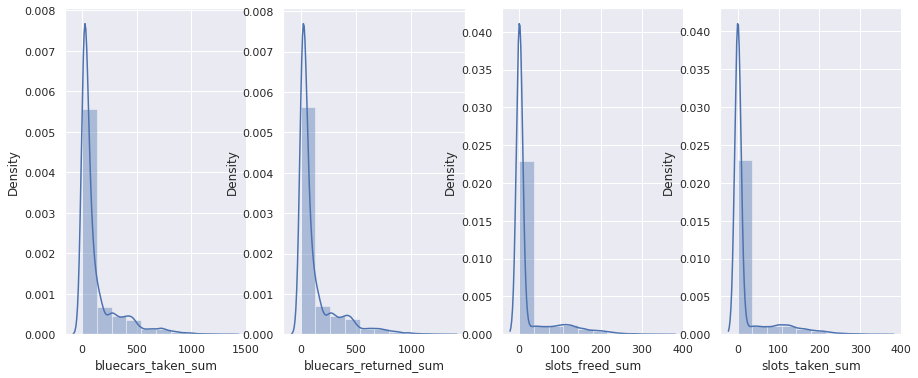

In [ ]:
#plotting the distribution of columns we are interested in on one figure container
fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize= (15,6))

sns.distplot(dfcol.bluecars_taken_sum, ax=ax1, bins= 10)
sns.distplot(dfcol.bluecars_returned_sum, ax=ax2, bins= 10)
sns.distplot(dfcol.slots_freed_sum, ax=ax3, bins= 10)
sns.distplot(dfcol.slots_taken_sum, ax=ax4, bins= 10)

Our data is leptokurtic i.e has an excess  positive kurtosis<br>
Our data has a high positive skewness in all the variables.

In [ ]:
#Find the range between the maximum and minimum value

maximum_value = dfcol.bluecars_taken_sum.max()
minimum_value = dfcol.bluecars_taken_sum.min()
range = maximum_value - minimum_value

print(range)

1352


In [ ]:
#Find the range between the maximum and minimum value

maximum_value = dfcol.slots_taken_sum.max()
minimum_value = dfcol.slots_taken_sum.min()
range = maximum_value - minimum_value

print(range)

359


In [ ]:
#Find the quartiles of the bluecars_returned_sum column

dfcol.bluecars_returned_sum.quantile([0.25, 0.5, 0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

In [ ]:
dfcol.bluecars_taken_sum.quantile([0.25, 0.5, 0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

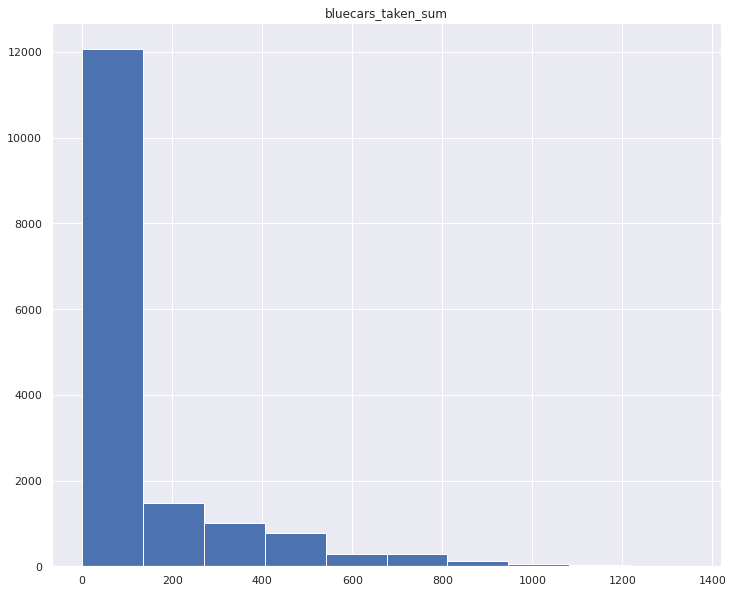

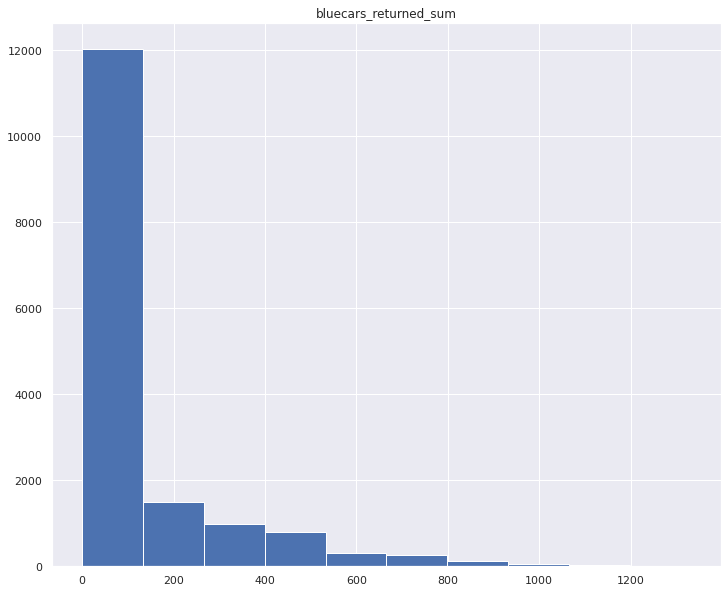

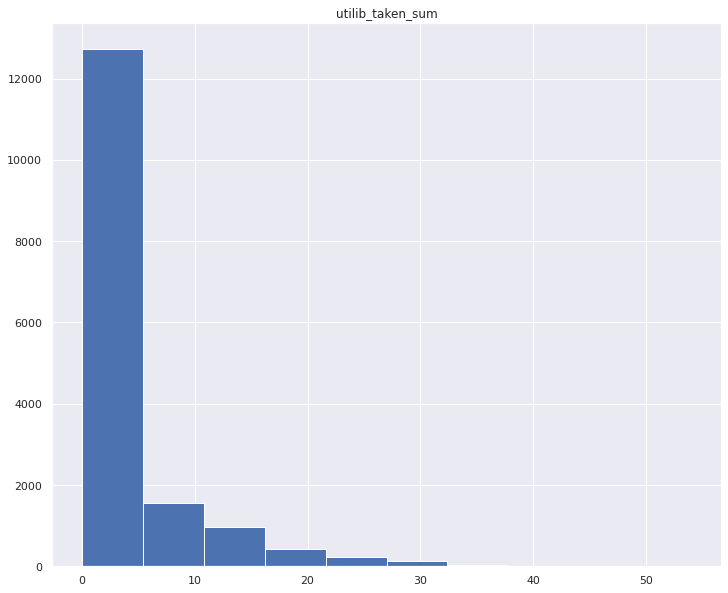

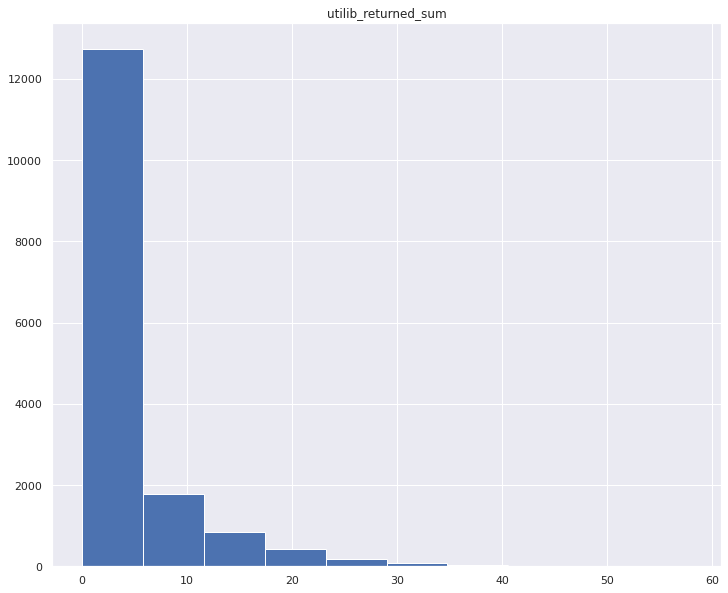

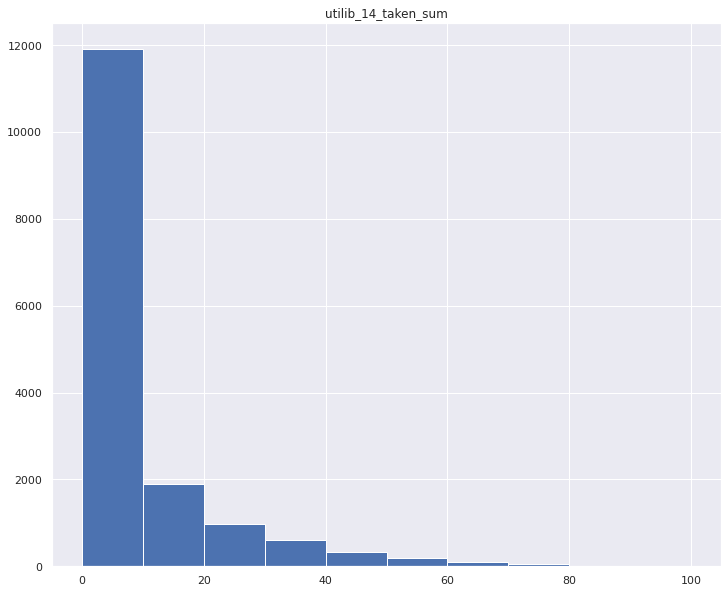

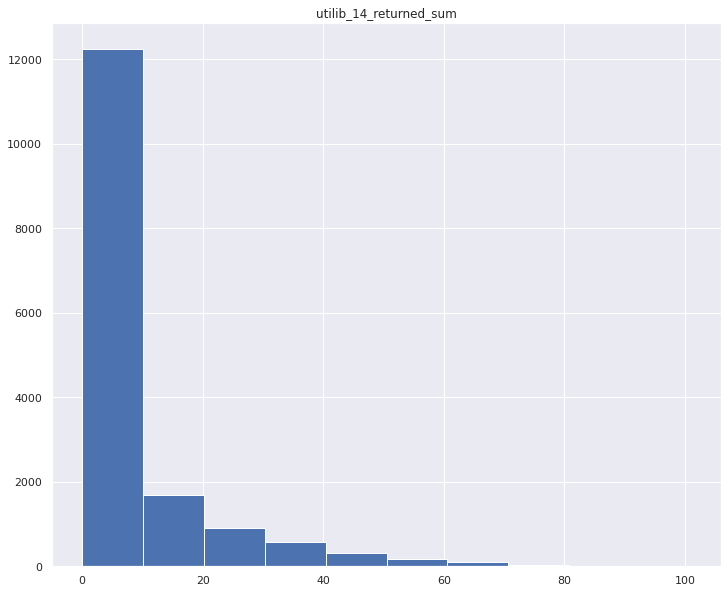

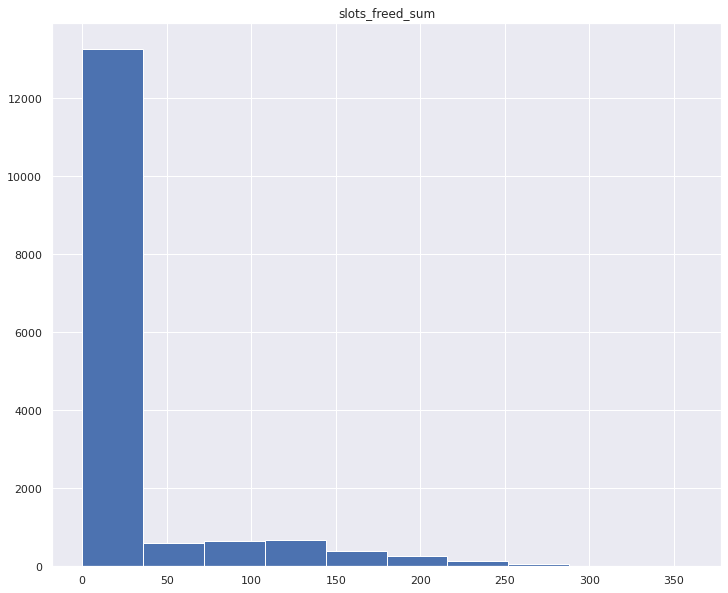

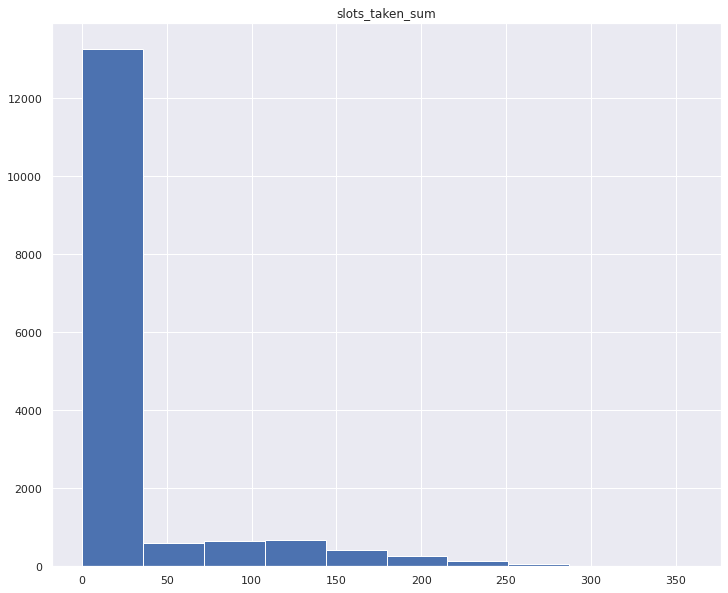

In [ ]:
#histogram plot for all numerical columns
for i in numcols:
  dfcol.hist(i)

Categorical

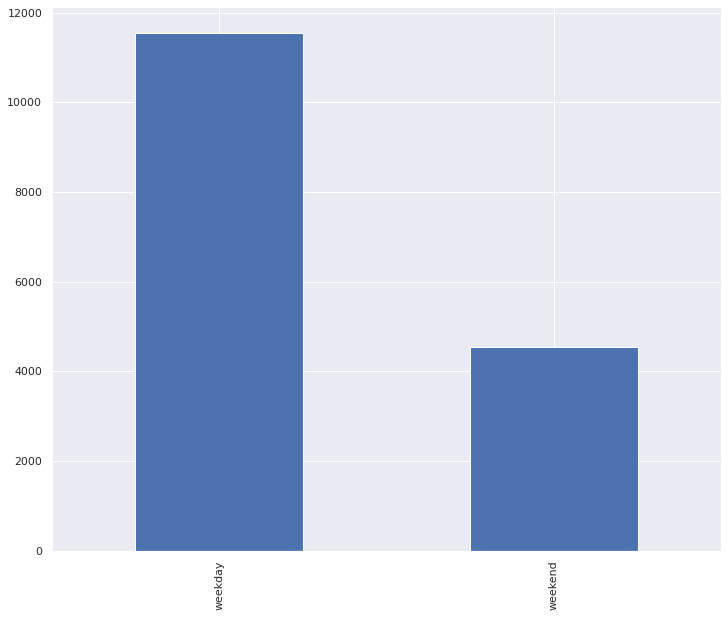

In [ ]:
#plotting categorical columns distribution using a histogram

# dfcol.groupby('day_type')['bluecars_taken_sum'].sum().plot.bar(stacked=True);
dfcol.day_type.value_counts().plot.bar()

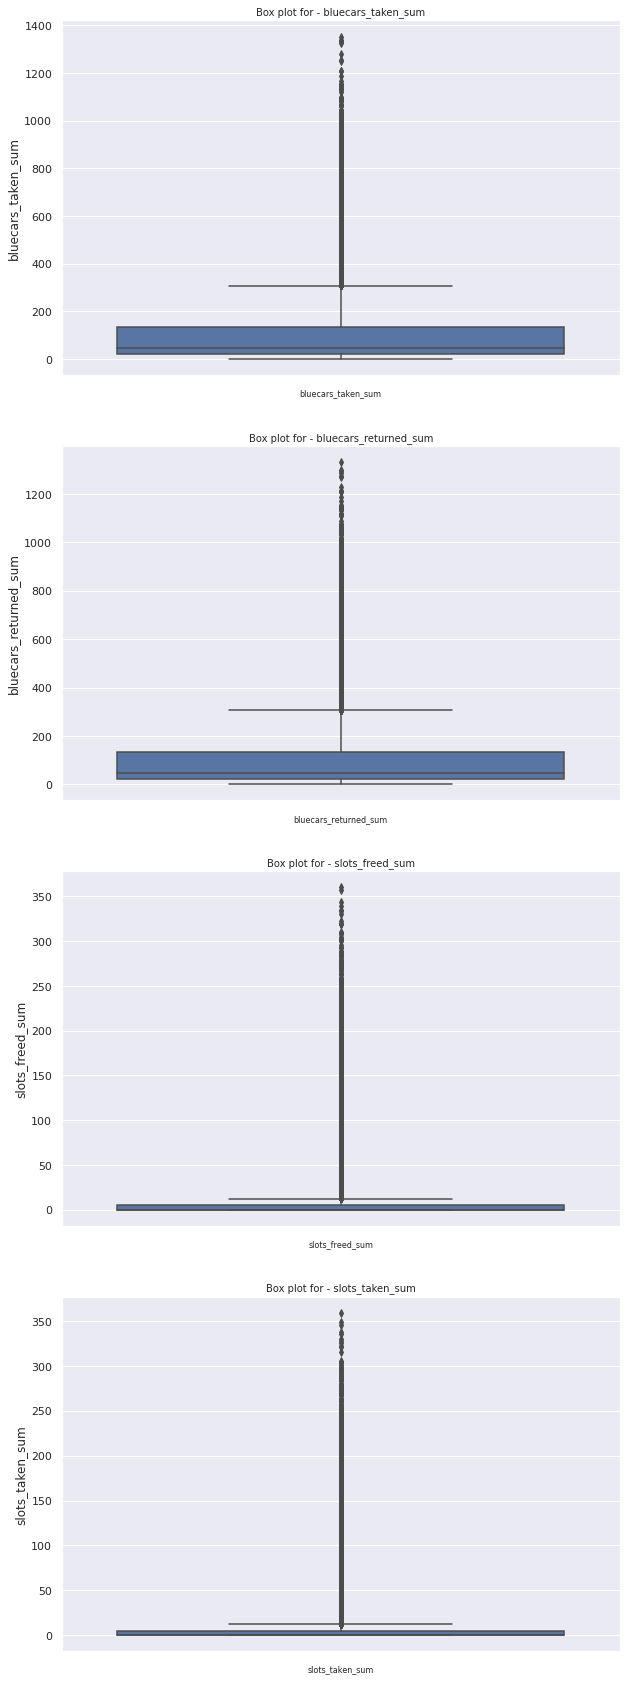

In [ ]:
#plotting the boxplots of interested columns in one figure container to check out outliers
col_names = ['bluecars_taken_sum','bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize= (10,30))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = dfcol[col_val], ax= ax[i])
  ax[i].set_title('Box plot for - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [ ]:
#checking for outliers
Q1=dfcol.quantile(0.25)
Q3=dfcol.quantile(0.75)
IQR=Q3-Q1
print(IQR)

postal_code               2070.0
n_daily_data_points          1.0
dayofweek                    4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64


In [ ]:
# #removing outliers
# We will not remove our outliers as they are too many nad they seem viable.

###Bivariate

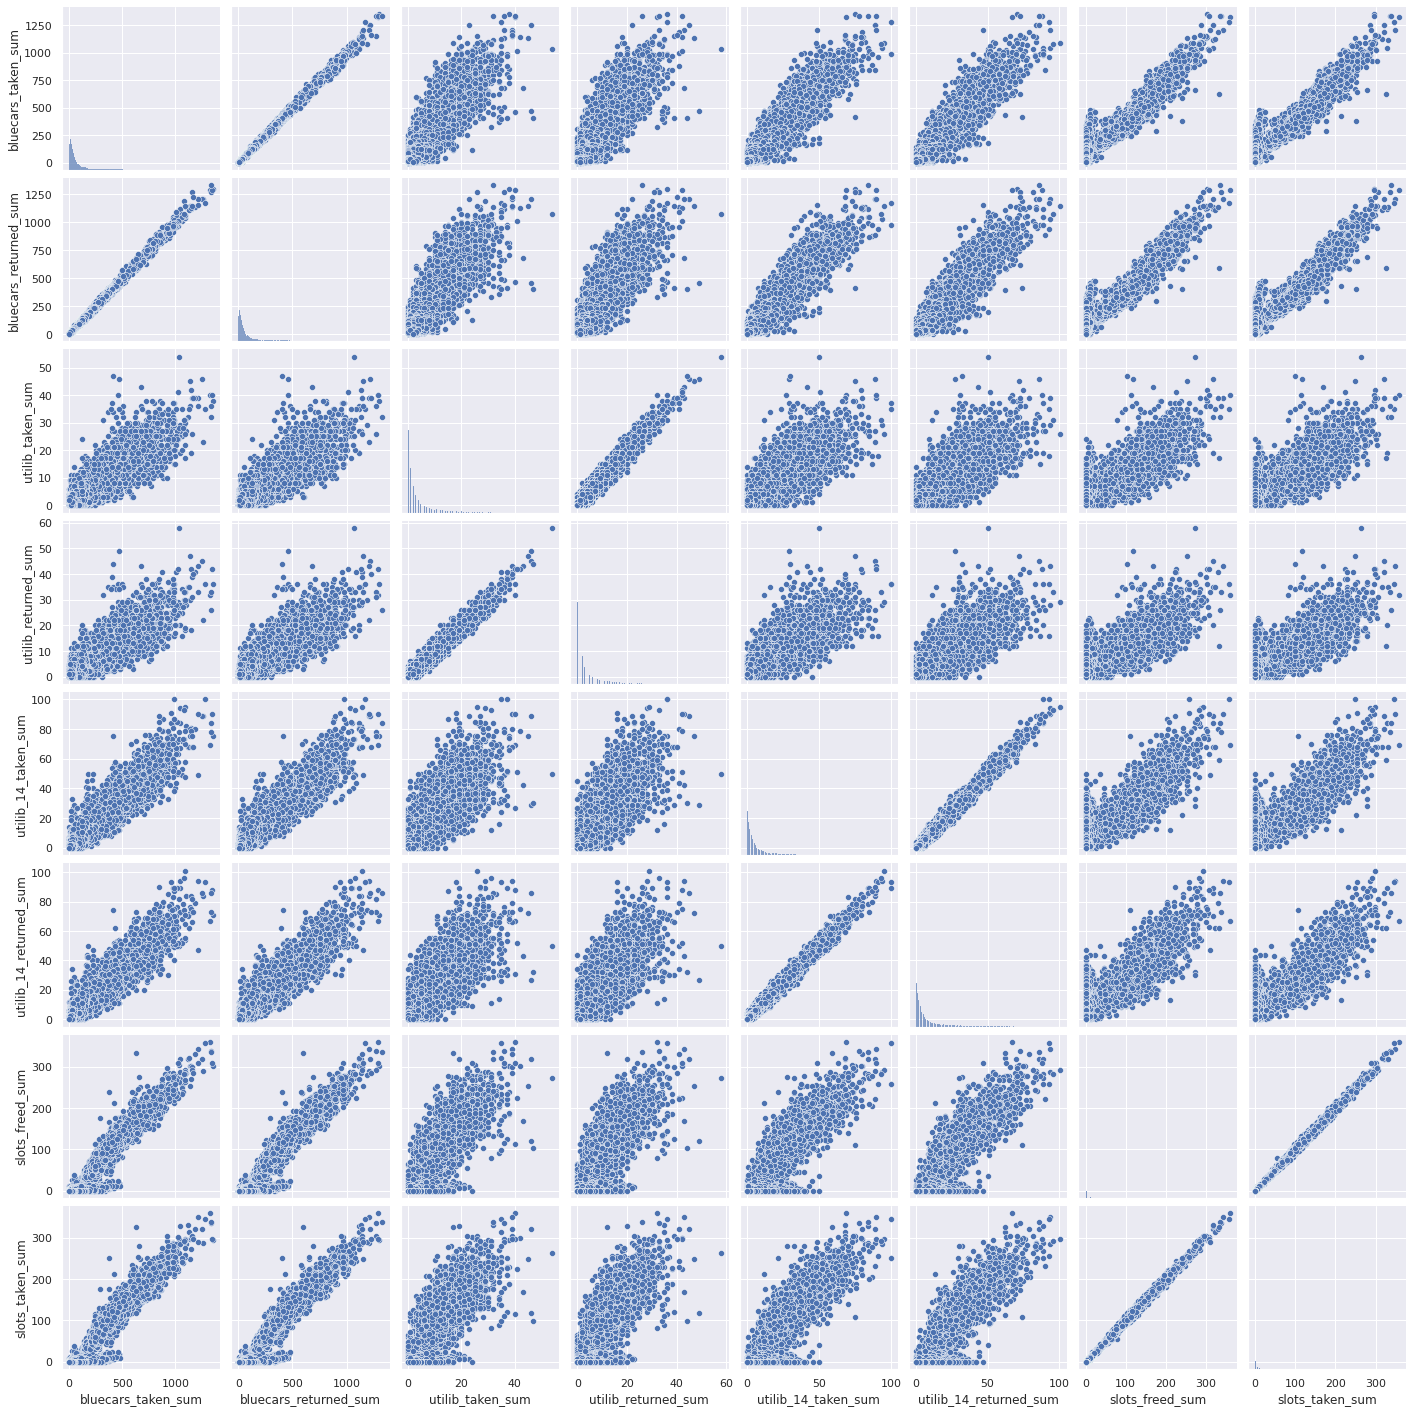

In [ ]:
#Correlation between numerical columns
sns.pairplot(dfcol[numcols])

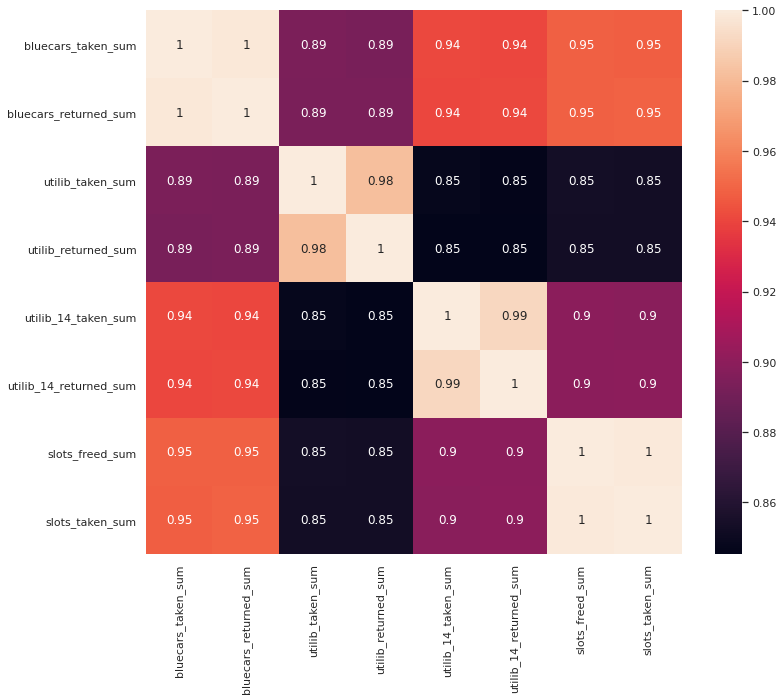

In [ ]:
#also checking the correlation strength
sns.heatmap(dfcol[numcols].corr(),annot=True)
plt.show()

Most of the columns are strongly correlated as seen in the scatter plots and heatmap above

###Hypothesis Testing

Hypothesis question/aim<br>
Determine if the statistical difference between mean of number of bluecars taken on weekdays for 75015 and mean of bluecars taken taken on weekdays for 75017


**Specify the Null Hypothesis**<br>
**Specify the Alternative Hypothesis** <br>
Null hypothesis (H0) : Mean of blue cars taken in postal code 75015 is statistically equal to the mean of blue cars taken in postal code 75017<br>
Alternative Hypothesis (H1) : Mean of blue cars taken in postal code 75015 is statistically not equal to the mean of blue cars taken in postal code 75017

H0 : μP1 = μP2<br>
H1 : μP1 ≠ μP2

In [ ]:
#Find mean of bluecars taken on weekdays
print('The mean of bluecars_taken on weekdays is ', weekdays["bluecars_taken_sum"].mean())

The mean of bluecars_taken on weekdays is  116.0286729036729


In [ ]:
#convert week column from integers to strings and create a dataframe for weekdays only
weekdays = dfcol[dfcol['day_type']== 'weekday']
weekdays
weekdays['dayofweek'] = weekdays.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                    3: 'Thursday', 4: 'Friday'})
weekdays

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,95880,6/13/2018,1440,Wednesday,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,Thursday,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0,2,3,0,0
16083,95880,6/18/2018,1440,Monday,weekday,11,14,3,5,2,2,0,0


In [ ]:
post1 = weekdays[weekdays['postal_code'] == 75015]
post1

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2184,75015,1/1/2018,1440,Monday,weekday,781,843,16,21,65,68,202,215
2185,75015,1/2/2018,1438,Tuesday,weekday,710,720,21,20,50,49,191,193
2186,75015,1/3/2018,1439,Wednesday,weekday,739,752,31,30,65,67,194,201
2187,75015,1/4/2018,1320,Thursday,weekday,669,644,15,15,61,58,165,158
2188,75015,1/5/2018,1440,Friday,weekday,852,846,21,18,70,71,196,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,75015,6/13/2018,1440,Wednesday,weekday,920,970,27,25,66,71,277,292
2334,75015,6/14/2018,1439,Thursday,weekday,946,930,27,29,61,58,274,264
2335,75015,6/15/2018,1440,Friday,weekday,1093,1056,30,30,58,54,288,294
2338,75015,6/18/2018,1440,Monday,weekday,669,698,26,22,59,58,183,183


In [ ]:
post2 = weekdays[weekdays['postal_code'] == 75017]
post2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2496,75017,1/1/2018,1440,Monday,weekday,634,671,16,15,63,67,159,171
2497,75017,1/2/2018,1438,Tuesday,weekday,548,542,13,15,40,33,125,126
2498,75017,1/3/2018,1439,Wednesday,weekday,638,616,15,13,27,26,153,144
2499,75017,1/4/2018,1320,Thursday,weekday,553,534,16,17,30,30,141,145
2500,75017,1/5/2018,1440,Friday,weekday,705,703,12,13,40,42,179,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,75017,6/13/2018,1440,Wednesday,weekday,777,765,21,23,42,42,203,202
2646,75017,6/14/2018,1439,Thursday,weekday,710,715,27,27,48,47,185,184
2647,75017,6/15/2018,1440,Friday,weekday,766,753,23,21,54,53,192,189
2650,75017,6/18/2018,1440,Monday,weekday,650,639,15,15,36,30,179,177


In [ ]:
post1.shape

(112, 13)

In [ ]:
post2.shape

(112, 13)

In [ ]:
sampledpost1 = post1['bluecars_taken_sum'].sample(frac=0.2)
sampledpost1.shape

(22,)

In [ ]:
sampledpost2= post2['bluecars_taken_sum'].sample(frac=0.2)
sampledpost2.shape

(22,)

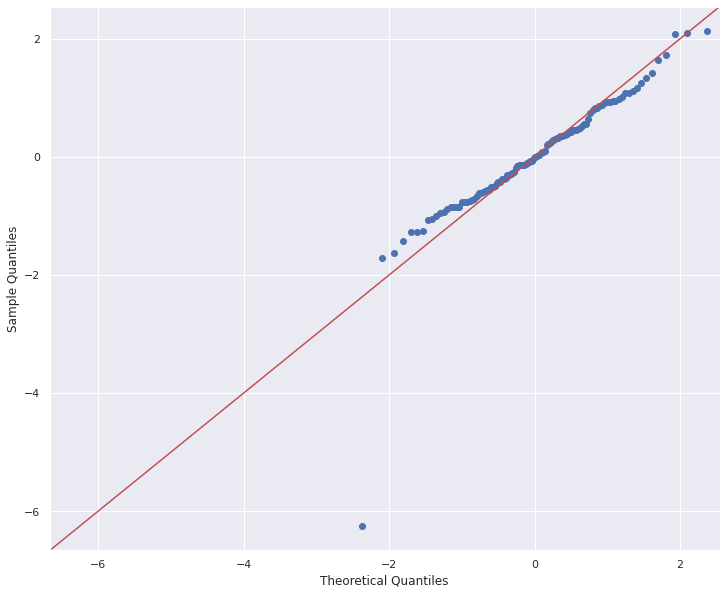

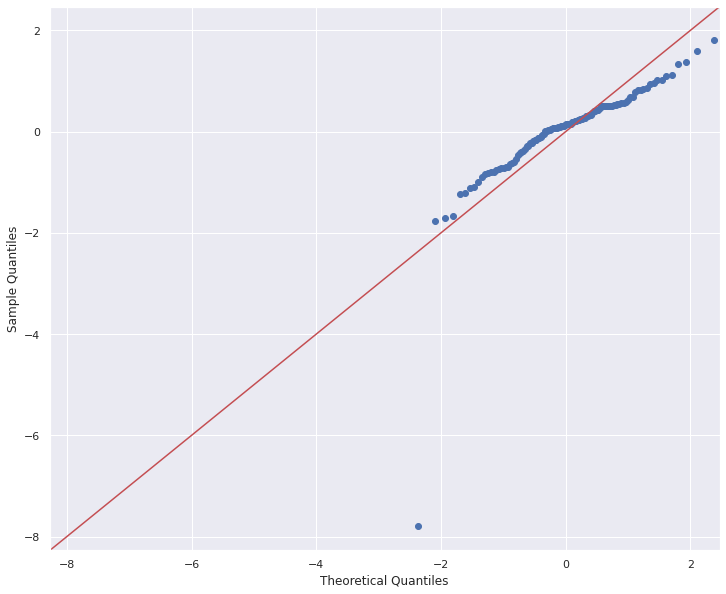

In [ ]:
#looking at our sample data distribution
# a qq plot of post1
fig = sm.qqplot(post1['bluecars_taken_sum'], fit = True, line= '45')
plt.show()

# a qq plot of post2
fig = sm.qqplot(post2['bluecars_taken_sum'], fit = True, line= '45')
plt.show()

**Set the Significance Level (a)**<br>
We set our significal level(alpha) at 0.05, the standard alpha.

Since our sample size is less than 30 and is normally distributed as in the samle qq plots above, the test statistic we are going to use is a t.test

**Calculate the Test Statistic and Corresponding P-Value**

In [ ]:
# let us perfrom our ttest
tstat, pval = stats.ttest_rel(sampledpost1, sampledpost2)
print('t statistic is: ', tstat)
print('p value is: ', pval)

t statistic is:  7.769705439363991
p value is:  1.3111418291241822e-07


Since our p value is less than set alpha(0.05 which is 5%), we are going to reject null hypothesis

**Drawing a Conclusion**<br>
After grouping the data by weekdays and postal codes 75015 and 75017, you gauge the difference between the two samples based ob bluecars taken. Based on your calculations, the difference between the two groups is statistically significant with a p-value of 1.3111418291241822e-07, well below the defined alpha of 0.05. You conclude that your results supports the alternative hypothesis that Mean of blue cars taken in postal code 75015 is statistically not equal to the mean of blue cars taken in postal code 75017.


###Point Estimate

In [ ]:
#point estimate
#The population mean for 75015 postal code
mean1 = post1['bluecars_taken_sum'].mean()
print('Population mean of bluecars taken for postal code 75015')
print(mean1,'\n')
#Show sample mean
mean2 =  sampledpost1.mean()
print ('Mean of sampled bluecars taken for postal code 75015')
print(mean2)

Population mean of bluecars taken for postal code 75015
827.8839285714286 

Mean of sampled bluecars taken for postal code 75015
847.8636363636364


In [ ]:
#The population mean for 75017 postal code
mean1a = post2['bluecars_taken_sum'].mean()
print('Population mean of bluecars taken for postal code 75017')
print(mean1a,'\n')
#Show sample mean
mean2b =  sampledpost2.mean()
print ('Mean of sampled bluecars taken for postal code 75017')
print(mean2b)

Population mean of bluecars taken for postal code 75017
696.5714285714286 

Mean of sampled bluecars taken for postal code 75017
696.3181818181819


In [ ]:
point_estimate = mean2-mean2b
point_estimate

151.5454545454545

The average number of bluecars taken from postal code 75015 is 151.54 points higher than it is for the average number of bluecars taken from postal code 75017.

###Confidence Interval

In [ ]:
# Step 1: Calculating the sample mean of the variable that we are interested in.
# Step 2: Calculating the standard error of the mean (SEM) – sample standard deviation divided by the square root of the sample size.
# Step 3: Calculating the confidence level – this can be any level, common ones being 95% and at times even 99%

#using 95% confidence level
#confidence level for postal code 75015
mean = mean1 #as calculated initially for sampledpost1

size = post1['bluecars_taken_sum'].shape[0]
size

std_error = post1['bluecars_taken_sum'].std() / np.sqrt(size)
std_error

stats.norm.interval(0.95, loc=mean, scale=std_error)


(804.6888754766074, 851.0789816662497)

Our sample mean of bluecars taken for postal code 75015 is 847.8636363636364 <br>
From the confidence level results above, we can be 95% certain that the population mean data is between 804.6888754766074 and 851.0789816662497 for postal code 75015 since it is within this interval

In [ ]:
#confidence level for postal code 75017
mean = mean1a #as calculated initially for sampledpost2

size = post2['bluecars_taken_sum'].shape[0]
size

std_error = post2['bluecars_taken_sum'].std() / np.sqrt(size)
std_error

stats.norm.interval(0.95, loc=mean, scale=std_error)

(680.8482501527757, 712.2946069900814)

Our sample mean of bluecars taken for postal code 75017 is 696.3181818181819 <br>
From the confidence level results above, we can be 95% certain that the population mean data is between 680.8482501527757 and 712.2946069900814 for postal code 75017 since it is within this interval

###Conclusion

After performing our test our results rejected the null hypothesis. There is sufficient evidence to conclude that the mean number of blue cars taken from postal code 75015 is statistically significantly different from the mean number of blue cars taken in postal code 75017. The two postal codes seem to be in the same area as they both start with 75'. 

###Recommendation
We can therefore see that there is likely a competitive nature of bluecars even in neighbouring areas.<br>
We can also recommend treating each postal area individually as evidence has it that customer engagement in even close postal codes is diferent.